## Problem Statement -

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. Although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. 

#### The company wants to know - 
1. Company wishes to identify the most potential leads, also known as ‘Hot Leads’. 
2. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.
3. Build a model wherein lead score needed to be assigned to each of the leads.
4. The customers with a higher lead score have a higher conversion chance.
5. The customers with a lower lead score have a lower conversion chance.

#### Goals -

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.
2. If the company's requirement changes in the future so you will need to handle these as well. 

**So interpretation is important!**

1. Reading and Understading the Data
    1. Read the Data
    2. Understand the Data
        1. Inspect the Data
        2. Check Data Quality
            1. Check Null or Missing Values
            2. Check Duplicate
            3. Data Cleaning (Identify any unknown value present in the dataset)
            4. Removing redundant and unwanted columns
2. Visualising the Data
    1. Checking for Outliers
    2. Data Analysis
3. Data Preparation
    1. Adding-Dummy-Variable
    2. Train-Test-Split
    3. Rescaling - Min-Max-Scaling
    4. Dividing into X and Y sets for the model building
4. Building a Logistic Regression Model
    1. RFE - Reccursive feature elimination
    2. Building Logistic Regression Model using Statmodel, for detailed statistics
    3. Cheking VIF for Multicollinearity
5. Plotting the ROC Curve
6. Finding Optimal Cutoff Point
7. Precision and Recall
8. Making Prediction using Final Model
9. Model Evaluation

### Importing Libraries

In [140]:
# Supress warnings

import  warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns",500)

In [2]:
# Import necessary Libraries

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Step:1 - Reading and Understading the Data

#### Read the Data -

In [3]:
# Read the data from csv file

lead_scoring_df = pd.read_csv('Leads.csv')

In [4]:
# Check the head of the dataset

lead_scoring_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Understand the Data -

#### Inspect the Data -

In [5]:
# Check the shape of the dataframe

lead_scoring_df.shape

(9240, 37)

In [6]:
# Check the info about columns - i.e. check null values and datatypes

lead_scoring_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
# Check the statistical aspects of dataframe

lead_scoring_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Check the statistical aspects of entire dataframe

lead_scoring_df.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,...,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,...,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,...,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,...,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,...,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,...,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


##### Inferences -
1. Dataset has 9240 rows and 37 columns.
2. There are 30 columns with categorical values, 4 columns with float values, 3 columns with integer values.
3. There are lot of null value for so many columns.

#### Check Data Quality -

##### -- Check Null or Missing Values -

In [9]:
# Check null/missing value in each column

round((lead_scoring_df.isnull().sum()/len(lead_scoring_df))*100, 2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [10]:
# Check null/missing value in each row

round((lead_scoring_df.isnull().sum(axis=1)/len(lead_scoring_df))*100, 2).sort_values(ascending=False)

3143    0.14
3597    0.14
3585    0.14
5432    0.14
2733    0.14
        ... 
7693    0.00
7690    0.00
7689    0.00
7687    0.00
9239    0.00
Length: 9240, dtype: float64

##### Inferences -
1. There are null / missing values in rows and columns.

##### -- Check Duplicate -

In [11]:
# Copy the dataset to other dataset

df_dup = lead_scoring_df.copy()

In [12]:
# Check for duplicates and Drop the duplicate row on new duplicate dataset

df_dup.drop_duplicates(subset=None, inplace=True)

In [13]:
# Check the shape of the duplicate dataset

df_dup.shape

(9240, 37)

In [14]:
# Check the shape of actual dataset

lead_scoring_df.shape

(9240, 37)

##### Inferences -
1. Shape of both dataset are similar after dropping duplicates with the help of duplicate command.
2. No duplicate values in this dataset. 

##### -- Data Cleaning (Identify any unknown value present in the dataframe) -

In [15]:
# Get the value counts of all columns

for column in lead_scoring_df:
    print(lead_scoring_df[column].astype('category').value_counts())
    print('---------------------------------------------------------')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
---------------------------------------------------------
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
---------------------------------------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
------

##### Inferences -
1. There are few columns have value called 'Select', converting those values to nan since the customer did not provide any value for these columns while entering data.
2. Columns are - 
    1. Specialization
    2. How did you hear about X Education
    3. Lead Profile
    4. City
3. Converting 'Select' values to 'NaN'.

In [16]:
# Converting 'Select' values to 'NaN'

lead_scoring_df = lead_scoring_df.replace('Select', np.NaN)

In [17]:
# Check null/missing value in each column

round((lead_scoring_df.isnull().sum()/len(lead_scoring_df))*100, 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [18]:
# Drop the columns having more than 30 percent of null/missing value

lead_scoring_df = lead_scoring_df.drop(['How did you hear about X Education', 'Lead Profile',
                                        'Lead Quality', 'Asymmetrique Profile Score',
                                       'Asymmetrique Activity Score', 'Asymmetrique Activity Index',
                                       'Asymmetrique Profile Index', 'City',
                                       'Specialization', 'Tags'], axis=1)

In [19]:
lead_scoring_df.shape

(9240, 27)

In [20]:
# Post dropping above column - Checking null/missing value in each column

round((lead_scoring_df.isnull().sum()/len(lead_scoring_df))*100, 2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Prospect ID                                       0.00
Newspaper Article                                 0.00
Magazine  

##### Inferences -
1. Few columns still having a good pwercentage of null values.
2. Columns are - 
    1. What matters most to you in choosing a course
    2. What is your current occupation 
    3. Country
    4. TotalVisits
    5. Page Views Per Visit 
    6. Last Activity 
    7. Lead Source
3. Now let decide by looking into each above mentioned columns and see whether we need to impute or drop the columns.

In [21]:
# Check the value counts for 'What matters most to you in choosing a course'

lead_scoring_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [22]:
# Find the percentage of different values/categories of 'What matters most to you in choosing a course' 

round(lead_scoring_df['What matters most to you in choosing a course'].value_counts(normalize=True)*100, 2)

Better Career Prospects      99.95
Flexibility & Convenience     0.03
Other                         0.02
Name: What matters most to you in choosing a course, dtype: float64

##### Inferences - So this is highly imbalance/skewed column with 29 percentage of null/missing data. Hence dropping the column

In [23]:
# Drop column -'What matters most to you in choosing a course'

lead_scoring_df = lead_scoring_df.drop(['What matters most to you in choosing a course'], axis=1)

In [24]:
lead_scoring_df.shape

(9240, 26)

In [25]:
# Check the value counts for 'What is your current occupation'

lead_scoring_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [26]:
# Since 29 percent of this column has no infotmation, 
# Hence adding a new category as 'No Information', which would replace the null/missing values

lead_scoring_df['What is your current occupation'] = lead_scoring_df['What is your current occupation'].replace(np.NaN, 'No Information')

In [27]:
lead_scoring_df['What is your current occupation'].isnull().sum()

0

In [28]:
lead_scoring_df['What is your current occupation'].value_counts()

Unemployed              5600
No Information          2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [29]:
len(lead_scoring_df['What is your current occupation'])

9240

In [30]:
# Check the value counts for 'Country'

lead_scoring_df.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

##### Inferences - So this is highly imbalance/skewed column with 27 percentage of null/missing data. Dropping this column.

In [31]:
# Impute value

lead_scoring_df = lead_scoring_df.drop(['Country'],  axis=1)

In [32]:
# Check the value counts for 'TotalVisits'

lead_scoring_df.TotalVisits.value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [33]:
# Check the median of column

lead_scoring_df.TotalVisits.median()

3.0

##### Inferences - So this column with 1.5 percentage of null/missing data. Hence not dropping the null rows . Imputing the null/missing values with median value.

In [34]:
# Impute value

lead_scoring_df.TotalVisits = lead_scoring_df.TotalVisits.replace(np.NaN, lead_scoring_df.TotalVisits.median())

In [35]:
lead_scoring_df.TotalVisits.value_counts()

0.0      2189
2.0      1680
3.0      1443
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [36]:
lead_scoring_df.TotalVisits.isnull().sum()

0

In [37]:
len(lead_scoring_df.TotalVisits)

9240

In [38]:
# Check the value counts for 'Page Views Per Visit'

lead_scoring_df['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [39]:
# Check the median of column

lead_scoring_df['Page Views Per Visit'].median()

2.0

In [40]:
# Impute value

lead_scoring_df['Page Views Per Visit'] = lead_scoring_df['Page Views Per Visit'].replace(np.NaN, lead_scoring_df['Page Views Per Visit'].median())


In [41]:
lead_scoring_df['Page Views Per Visit'].isnull().sum()

0

In [42]:
len(lead_scoring_df['Page Views Per Visit'])

9240

In [43]:
# Check the value counts for 'Last Activity'

lead_scoring_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

##### Inferences - Since not have 1 percent of data of it. Hence imputing the null/missing value by new category 'Not Sure'

In [44]:
# Impute value

lead_scoring_df['Last Activity'] = lead_scoring_df['Last Activity'].replace(np.NaN, 'Not Sure')

In [45]:
lead_scoring_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Not Sure                         103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [46]:
len(lead_scoring_df['Last Activity'])

9240

In [47]:
# Check the value counts for 'Lead Source'

lead_scoring_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

##### Inferences - 
1. Category Google appears twice with different cases.
2. Convering them into same case.
3. Since Google has major portion of the data, imputting null/missing values with Google.

In [48]:
# Replace and Impute

lead_scoring_df['Lead Source'] = lead_scoring_df['Lead Source'].replace('google', 'Google')
lead_scoring_df['Lead Source'] = lead_scoring_df['Lead Source'].replace(np.NaN, 'Google')

In [49]:
lead_scoring_df['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [50]:
lead_scoring_df['Lead Source'].isnull().sum()

0

In [51]:
len(lead_scoring_df['Lead Source'])

9240

In [52]:
# Post changes in above columns - Checking null/missing value in each column

round((lead_scoring_df.isnull().sum()/len(lead_scoring_df))*100, 2).sort_values(ascending=False)

Prospect ID                                 0.0
Magazine                                    0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Search                                      0.0
Lead Number                                 0.0
What is your current occupation             0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                                   0.0
Do Not Call                             

In [53]:
lead_scoring_df.shape

(9240, 25)

##### -- Removing redundant and unwanted columns -
1. Columns which has only one value 'NO' in all the rows.
2. Seems these columns will not provide any insight to the Lead.
3. Dropping these columns.
    1. Magazine
    2. Receive More Updates About Our Courses
    3. Update me on Supply Chain Content
    4. Get updates on DM Content
    5. I agree to pay the amount through cheque

In [54]:
lead_scoring_df = lead_scoring_df.drop(['Magazine', 'Receive More Updates About Our Courses',
                                        'Update me on Supply Chain Content', 'Get updates on DM Content',
                                        'I agree to pay the amount through cheque', 'Newspaper Article', 
                                        'X Education Forums', 'Newspaper', 
                                        'Digital Advertisement',
                                        'Through Recommendations'], axis=1)

In [55]:
lead_scoring_df.shape

(9240, 15)

### Step:2 - Visualising the Data

#### Checking for Outliers

In [56]:
# Checking outliers for continuous variables at 25%, 50%, 75%, 90%, 95% and 99%
lead_scoring_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


##### Inferences - 
1. Following columns have outliers.
    1. TotalVisits
    2. Page Views Per Visit

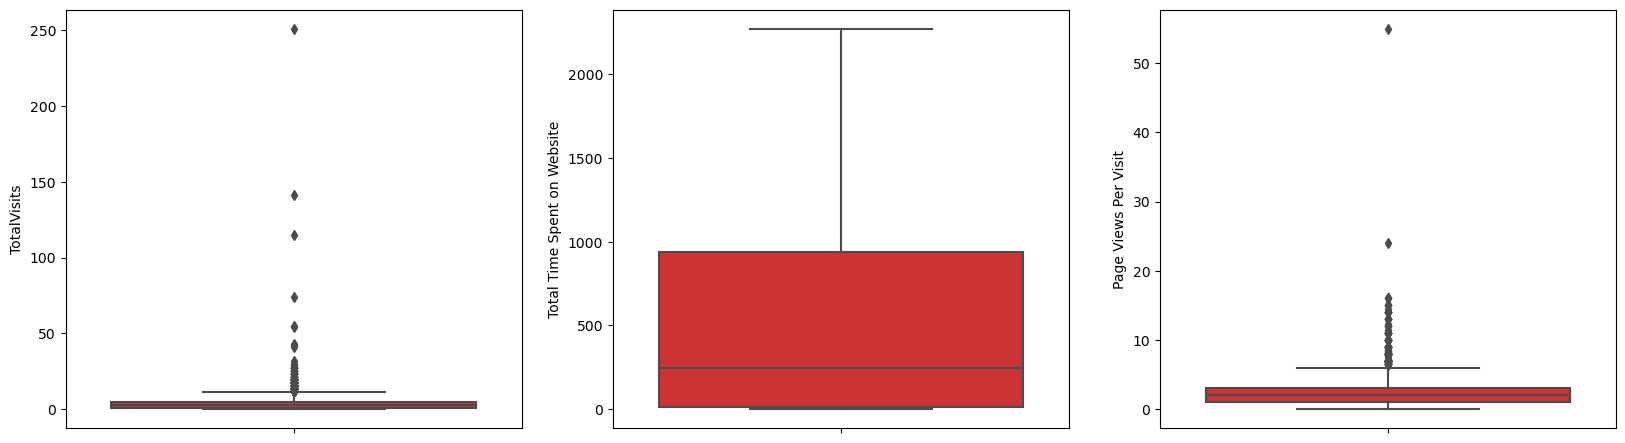

In [57]:
# Check outliers in those 2 numerical column

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set1', data = lead_scoring_df)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set1', data = lead_scoring_df)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set1', data = lead_scoring_df)
plt.show()

In [58]:
# Remove values beyond 99% of 'TotalVisits'

max_quartile_total_visits = lead_scoring_df.TotalVisits.quantile(.99)
lead_scoring_df = lead_scoring_df[lead_scoring_df.TotalVisits < max_quartile_total_visits]

In [59]:
lead_scoring_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9141.00000,9141.000000,9141.000000,9141.000000,9141.000000
mean,617233.45192,0.385406,3.179740,486.074609,2.329506
std,23413.72193,0.486718,2.913631,547.856302,2.046673
min,579533.00000,0.000000,0.000000,0.000000,0.000000
25%,596519.00000,0.000000,1.000000,10.000000,1.000000
50%,615563.00000,0.000000,3.000000,247.000000,2.000000
75%,637414.00000,1.000000,5.000000,933.000000,3.000000
90%,650514.00000,1.000000,7.000000,1379.000000,5.000000
95%,655406.00000,1.000000,9.000000,1561.000000,6.000000
99%,659592.80000,1.000000,13.000000,1839.600000,9.000000


In [60]:
# Remove values beyond 99% of 'Page Views Per Visit'

max_quartile_page_visits = lead_scoring_df['Page Views Per Visit'].quantile(.99)
lead_scoring_df = lead_scoring_df[lead_scoring_df['Page Views Per Visit'] < max_quartile_page_visits]

In [61]:
lead_scoring_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000
mean,617223.248422,0.385092,3.087164,483.133016,2.226383
std,23372.383121,0.486644,2.801244,547.420675,1.823395
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596530.000000,0.000000,1.000000,7.000000,1.000000
50%,615645.000000,0.000000,3.000000,245.000000,2.000000
75%,637360.000000,1.000000,4.000000,929.000000,3.000000
90%,650463.200000,1.000000,7.000000,1378.000000,5.000000
95%,655351.600000,1.000000,8.000000,1558.000000,6.000000
99%,659577.800000,1.000000,13.000000,1839.720000,7.000000


In [62]:
# Check percentage of data retained

round((len(lead_scoring_df)/9240)*100, 2)

97.72

##### Inferences - 98% data has been reatained

#### Data Analysis

In [63]:
lead_scoring_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation', 'Search',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

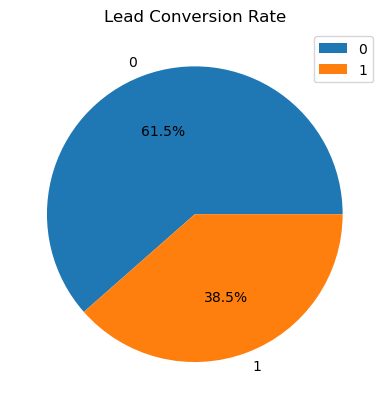

In [64]:
# Converted - Traget Variable

lead_scoring_df['Converted'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',ylabel='')
plt.title('Lead Conversion Rate')
plt.legend()
plt.show()

##### Inferences - The lead conversion rate is 38%

In [65]:
# Percentage of conversion
Converted_yes = lead_scoring_df[lead_scoring_df['Converted']==1]
Converted_yes.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,A free copy of Mastering The Interview,Last Notable Activity
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Student,No,Yes,Email Opened
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,Unemployed,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,Email Opened,Unemployed,No,No,Modified
10,2a369e35-ca95-4ca9-9e4f-9d27175aa320,660608,Landing Page Submission,Organic Search,No,No,1,8.0,1351,8.00,Email Opened,Unemployed,No,Yes,Email Opened
11,9bc8ce93-6144-49e0-9f9d-080fc980f83c,660570,Landing Page Submission,Direct Traffic,No,No,1,8.0,1343,2.67,Page Visited on Website,Unemployed,No,Yes,Page Visited on Website


In [66]:
Converted_no = lead_scoring_df[lead_scoring_df['Converted']==0]
Converted_no.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,No Information,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,No Information,No,No,Modified


In [67]:
category_column = lead_scoring_df.select_dtypes(include = ['object'])
new_category_column = category_column.drop('Prospect ID',axis=1)
new_category_column.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'What is your current occupation', 'Search',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [68]:
def catplot(a):
    print("-----------------------------------------------------------------------------------------------")
    print(f"Figure Name : {a}")
    fig = plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    #Number of prospects in each
    sns.countplot(x = a, data = lead_scoring_df)
    

    plt.xticks(rotation=90)
    
    plt.subplot(1,3,2)
    #Out of each how many are converted
    sns.countplot(x = a, hue = "Converted", data = lead_scoring_df)
    plt.xticks(rotation = 90)
    
    
    plt.subplot(1,3,3)
    #percentage of prospects with yes
    (100*Converted_yes[a].value_counts()/lead_scoring_df[a].value_counts()).sort_values().plot(kind='bar',figsize=(20,5.8)).set_ylabel("Percentage of converted Leads[%]")
    print("-----------------------------------------------------------------------------------------------")
    plt.show()
 
       
    fig.tight_layout()
    

-----------------------------------------------------------------------------------------------
Figure Name : Lead Origin
-----------------------------------------------------------------------------------------------


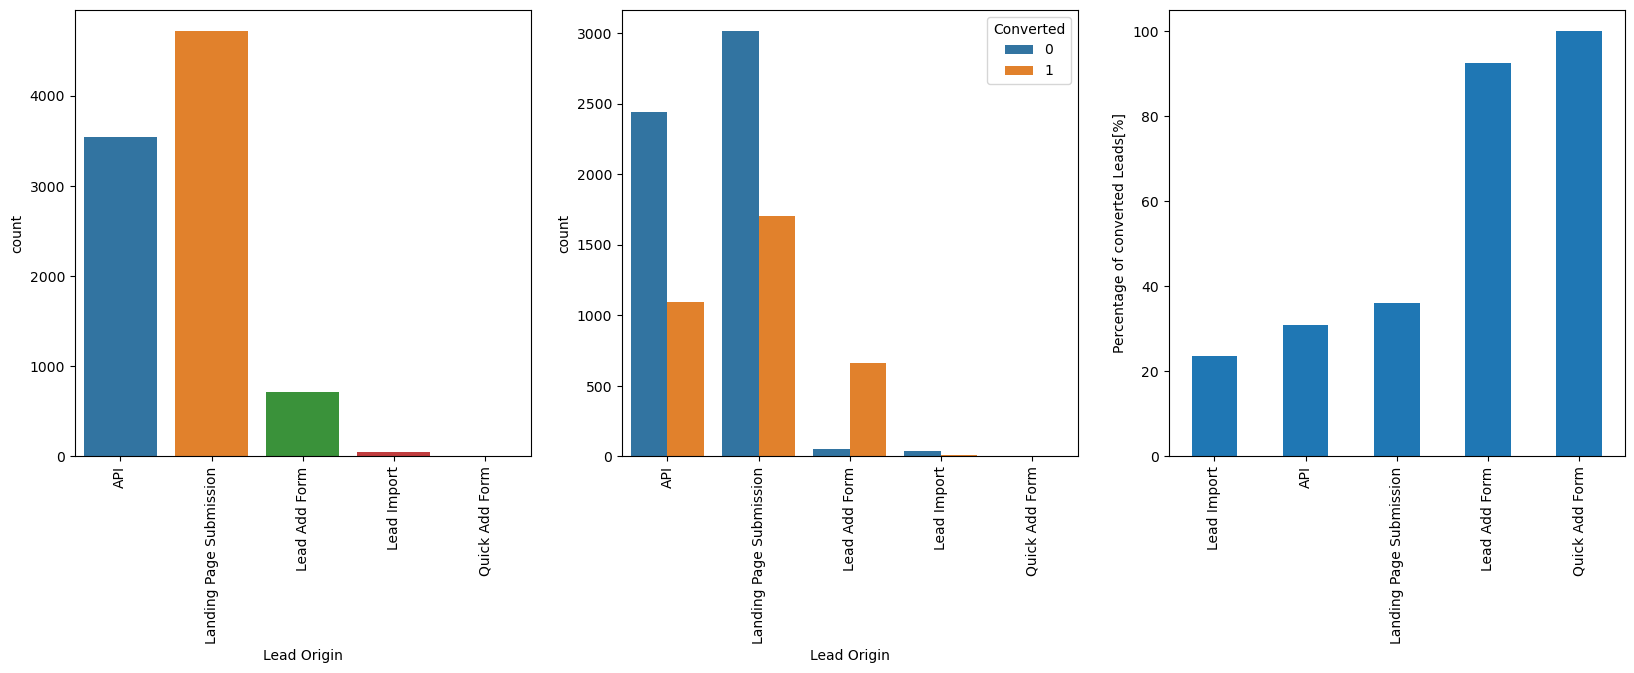

-----------------------------------------------------------------------------------------------
Figure Name : Lead Source
-----------------------------------------------------------------------------------------------


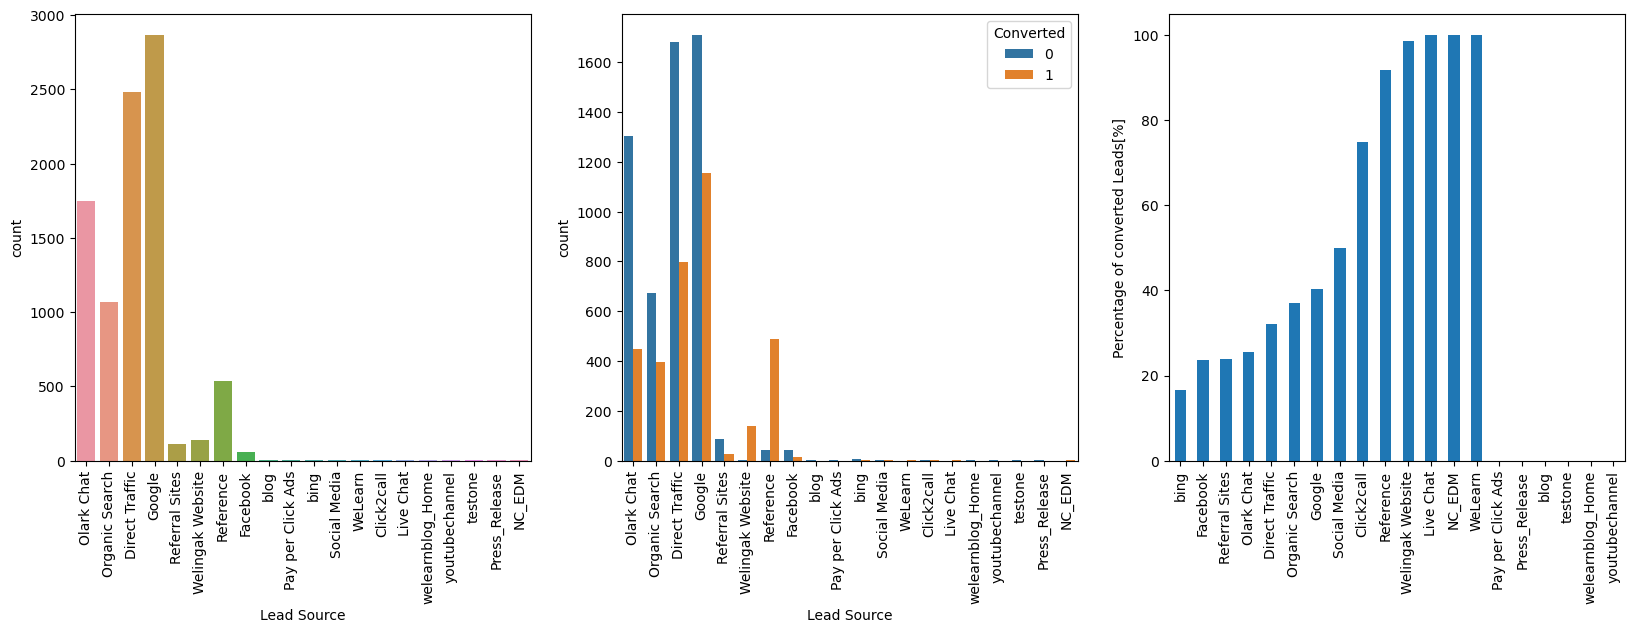

-----------------------------------------------------------------------------------------------
Figure Name : Do Not Email
-----------------------------------------------------------------------------------------------


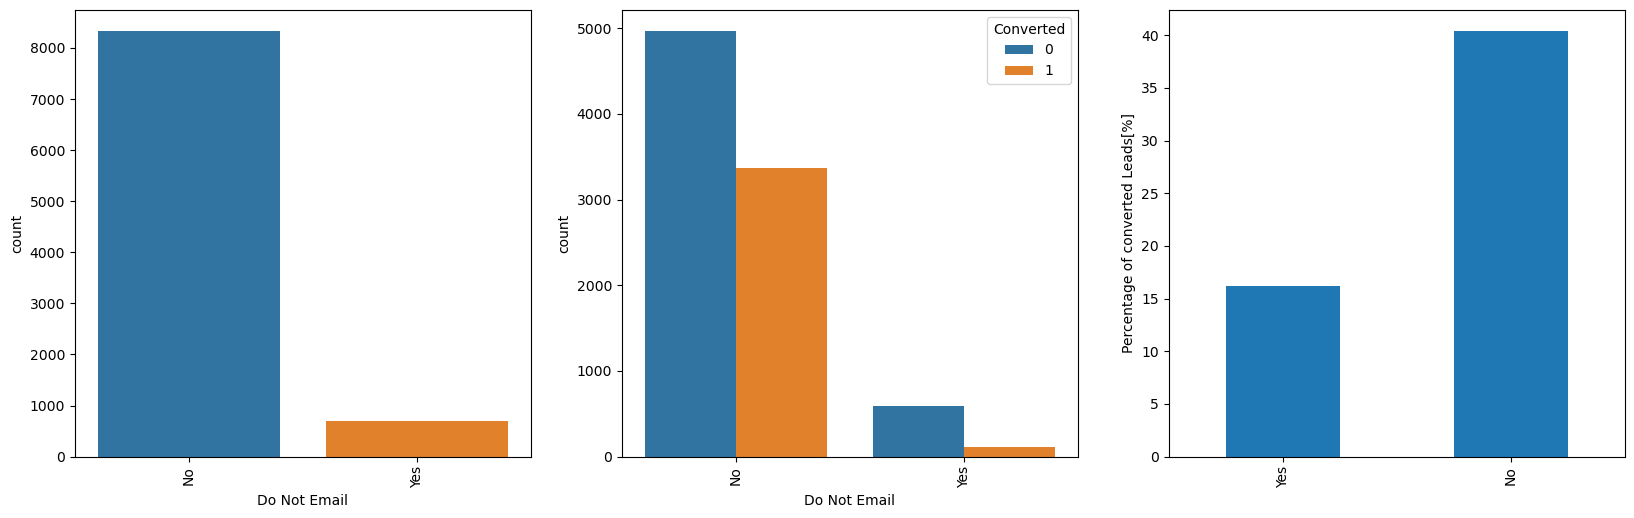

-----------------------------------------------------------------------------------------------
Figure Name : Do Not Call
-----------------------------------------------------------------------------------------------


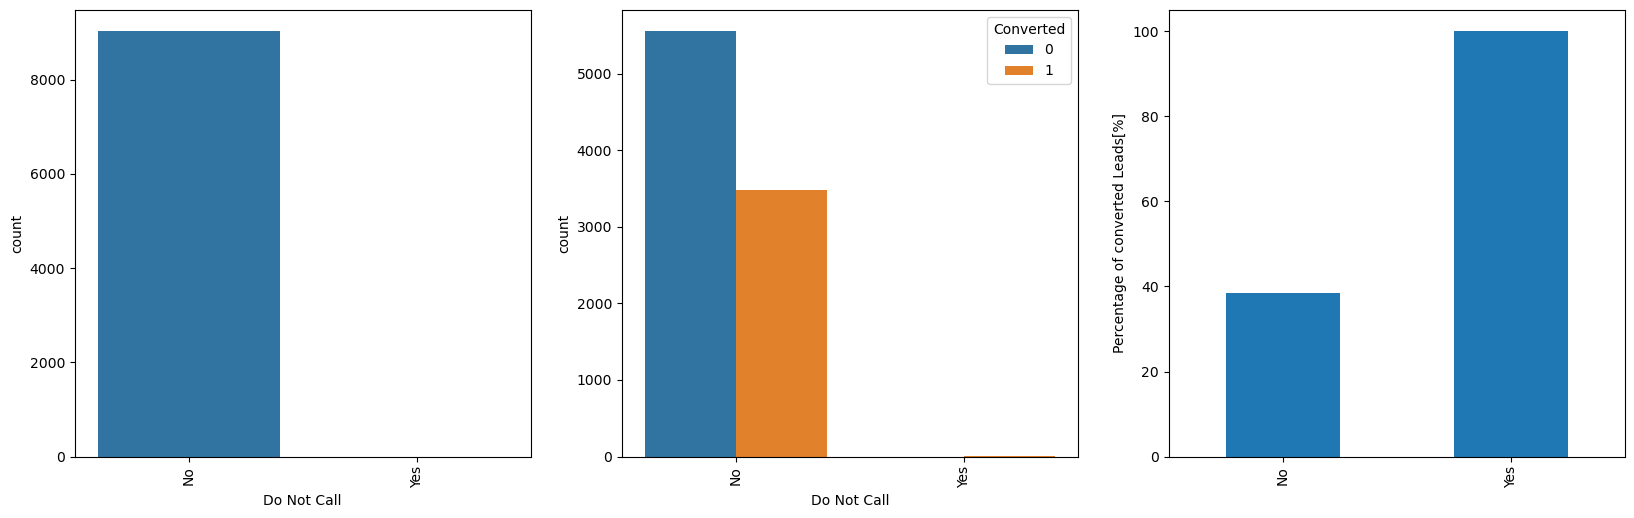

-----------------------------------------------------------------------------------------------
Figure Name : Last Activity
-----------------------------------------------------------------------------------------------


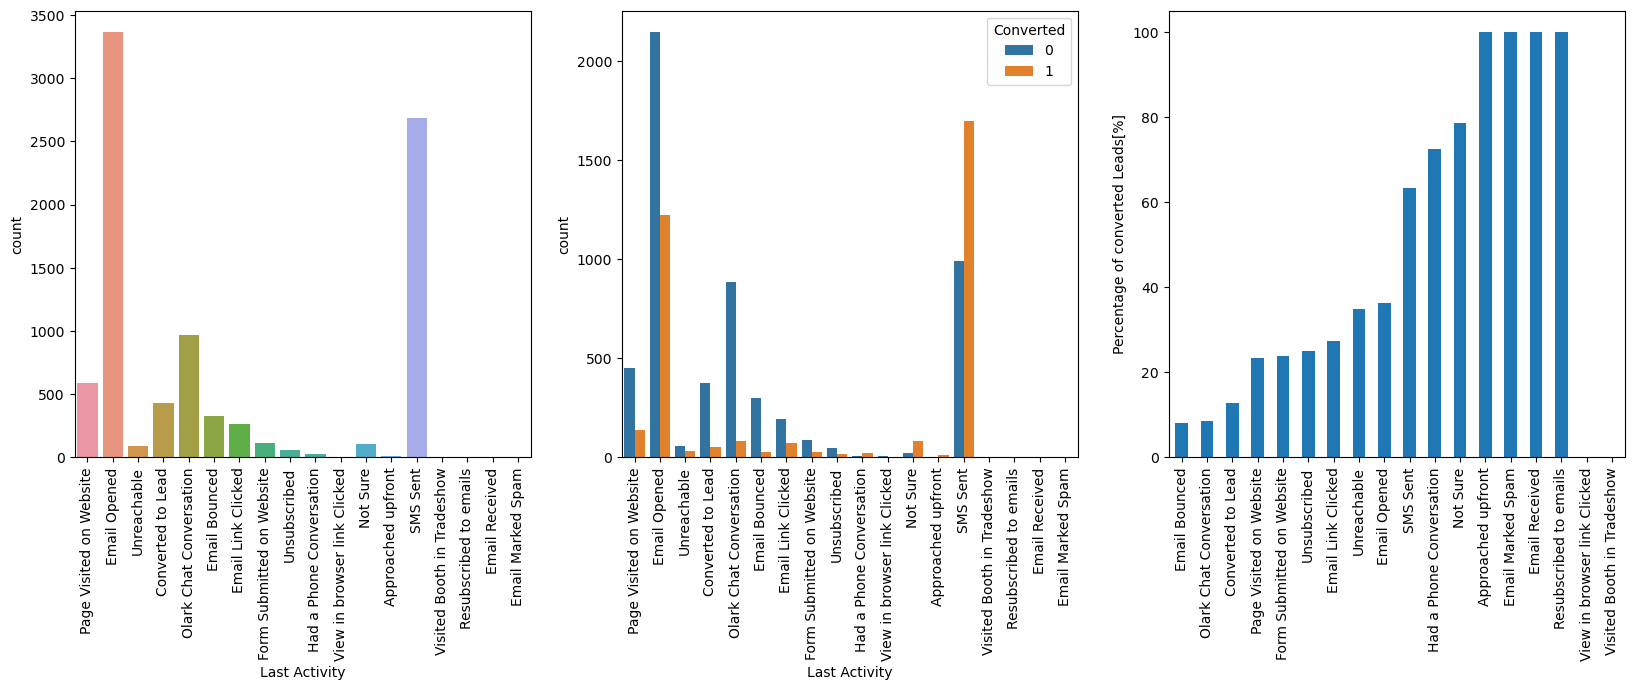

-----------------------------------------------------------------------------------------------
Figure Name : What is your current occupation
-----------------------------------------------------------------------------------------------


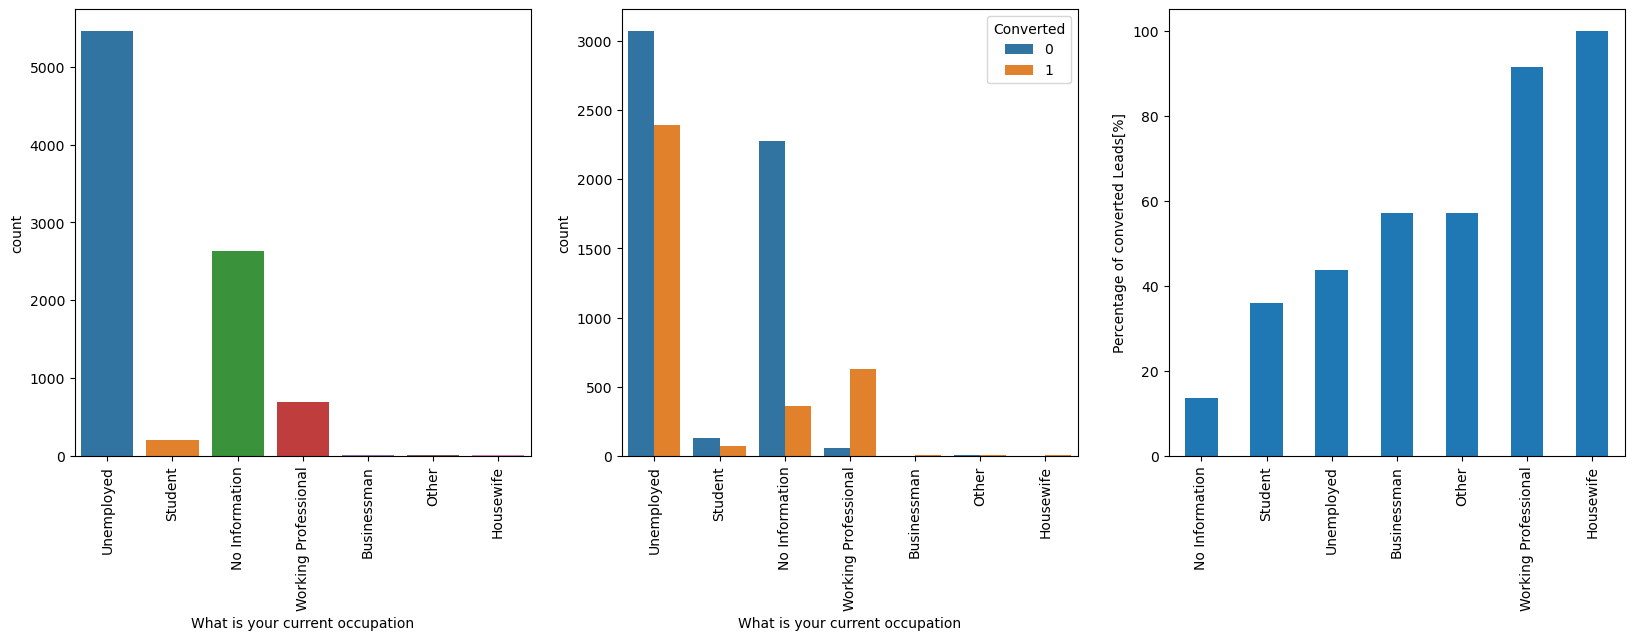

-----------------------------------------------------------------------------------------------
Figure Name : Search
-----------------------------------------------------------------------------------------------


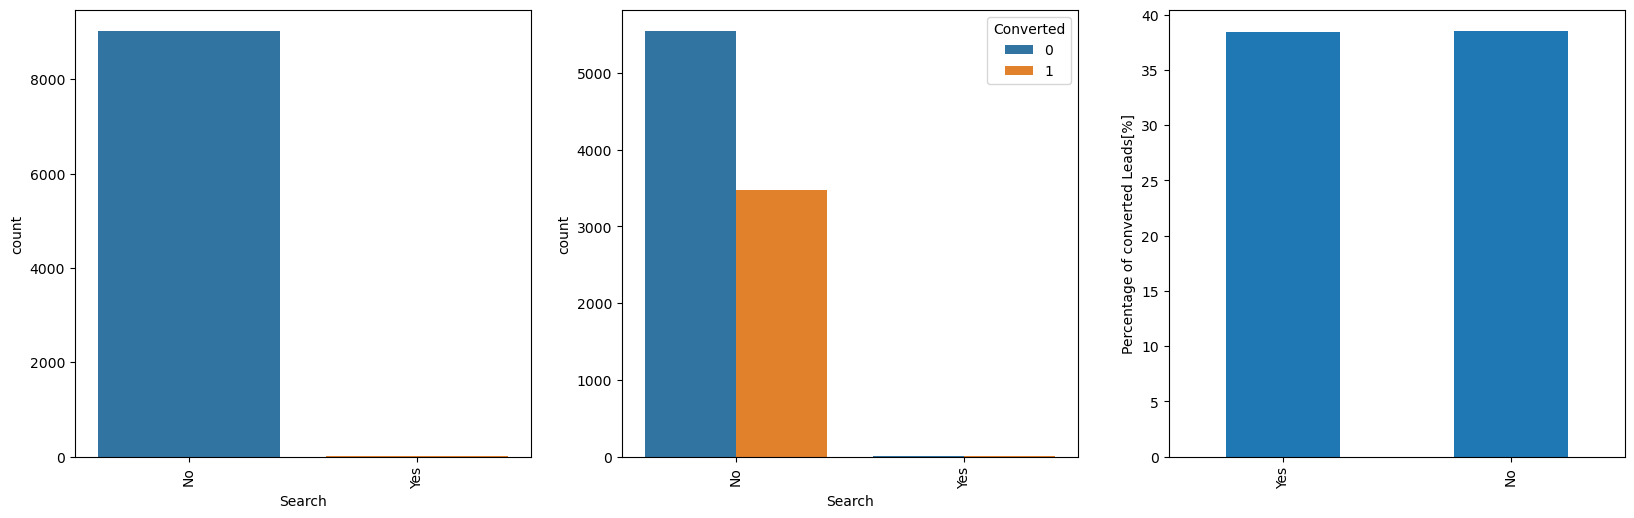

-----------------------------------------------------------------------------------------------
Figure Name : A free copy of Mastering The Interview
-----------------------------------------------------------------------------------------------


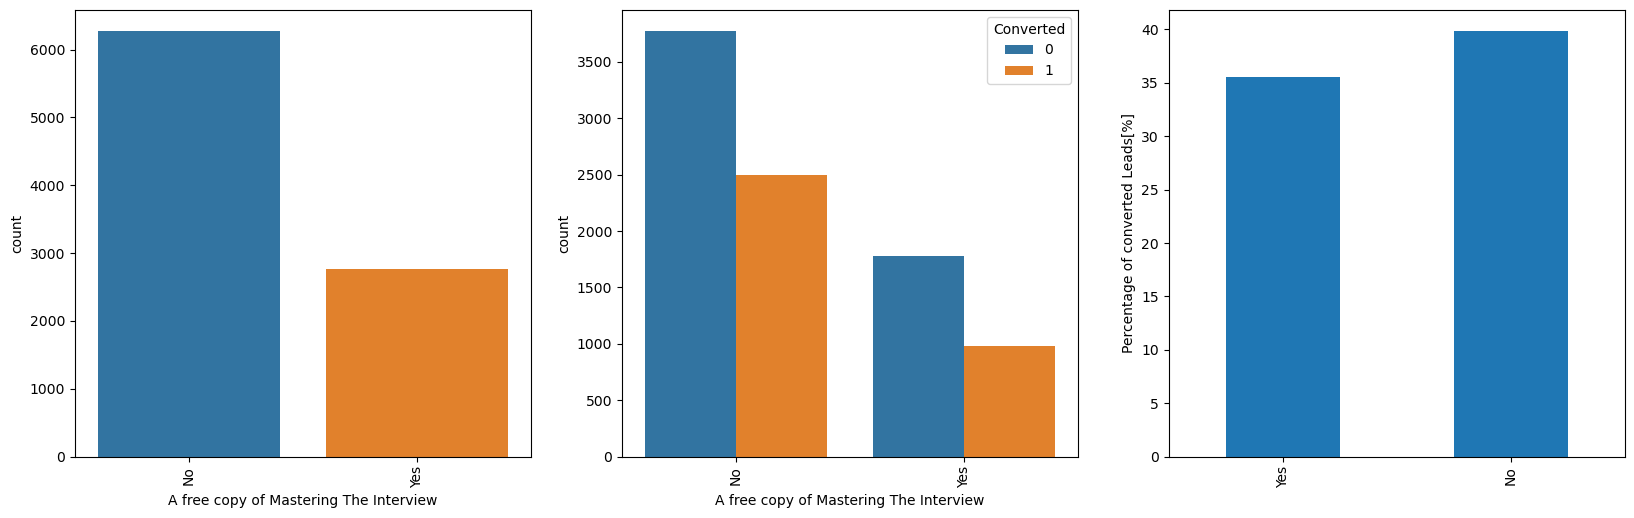

-----------------------------------------------------------------------------------------------
Figure Name : Last Notable Activity
-----------------------------------------------------------------------------------------------


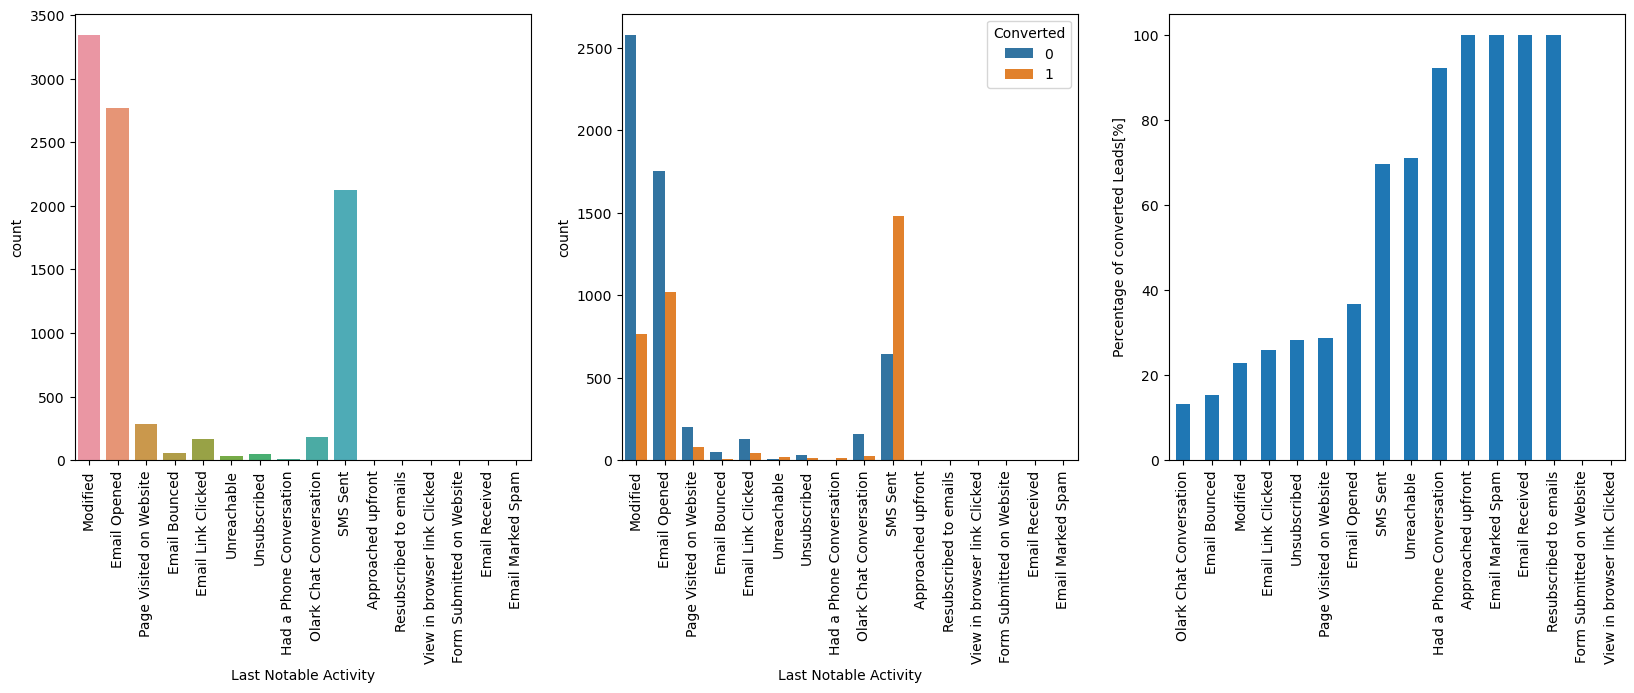

In [69]:
for i in new_category_column.columns:
    catplot(i)

##### Inferences:

##### Figure Name : Lead Origin
   1. Most Leads originated from landing page submission and mimimum is from Quick Add Form
   2. Lead received from Quick Add Form are 100% Converted, but there is only 1 such lead
   3. Lead Add Form are the second highest in conversions at around 90% 

##### Figure Name : Lead Source
   1. Google and Direct Traffic generates maximum number of Leads. Out of the total leads from google 40% of the leads converted along with Direct traffic
   2. NC_EDM and Welingak Website have higher conversion rate., but there is very less number of leads from these sources
   3. Reference leads have 90 % of the conversion rate (total of 534 leads from reference)
   
##### Figure Name : Do Not Email
   1. Mostly people are fine in receiving emails from X Education.
   2. People who are not fine in receiving email have lower rate of conversion (only 15%) whereas people who are fine with emails have 40% of the conversion rate
   
##### Figure Name: Do Not Call
   1. Mostly people are fine in receiving calls from X Education
   2. People who are fine in receiving calls have lower rate of conversion (only 40%) whereas people who are not fine with calls have 100% of the conversion rate - this is because very few were not OK with receiving calls. Later we can consider of dropping this parameter

##### Figure Name: Last Activity
   1. Most of the prospects have 'Email Opened' as their last activity
   2. Conversion rate of leads with last activity as email opened is about 35% and leads with last activity as SMS Sent is almost 60%
   3. Conversion rate of leads with last activity as not sure is 80%
  
##### Figure Name:What is your current occupation
   1. Unemployed people are highest in number with 45%(approx.) as a conversion rate
   2. Housewife are lesser in number but their conversion rate is 100% followed by working professional and others

##### Figure Name:Search
   1. Through Search (yes) 14 whereas Search(No) 9226 
   2. Conversion rate for both through search and not search are almost same 

##### Figure Name:A free copy of Mastering The Interview
   1. Conversion rate is high for who do not want a free copy of mastering interview

In [70]:
numerical_column = lead_scoring_df.select_dtypes(include = ['int','float'])
new_numerical_column = numerical_column.drop(['Lead Number','Converted'],axis=1)
new_numerical_column.columns
# new_category_column = category_column.drop('Prospect ID',axis=1)
# new_category_column.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

In [71]:
def numplot(b):
    print("-----------------------------------------------------------------------------------------------")
    print(f"Figure Name : {b}")
    fig = plt.figure(figsize=(15,5))
    sns.distplot(Converted_yes[b],hist=False,kde=True,color='r',label='Converted')
    sns.distplot(Converted_no[b],hist=False,kde=True,label='Not converted')
    plt.legend()
    print("-----------------------------------------------------------------------------------------------")
    plt.show()
 
       
    fig.tight_layout()
    

-----------------------------------------------------------------------------------------------
Figure Name : TotalVisits
-----------------------------------------------------------------------------------------------


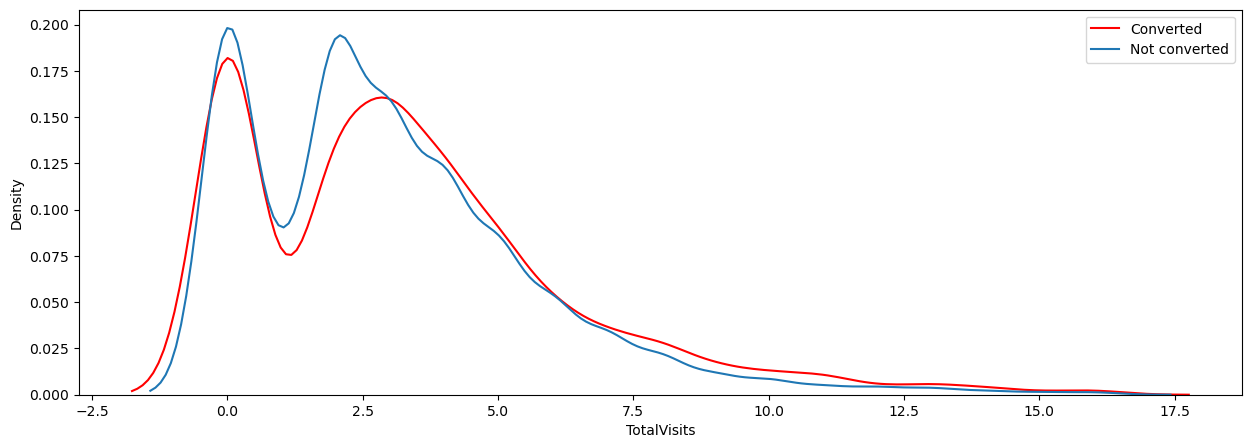

-----------------------------------------------------------------------------------------------
Figure Name : Total Time Spent on Website
-----------------------------------------------------------------------------------------------


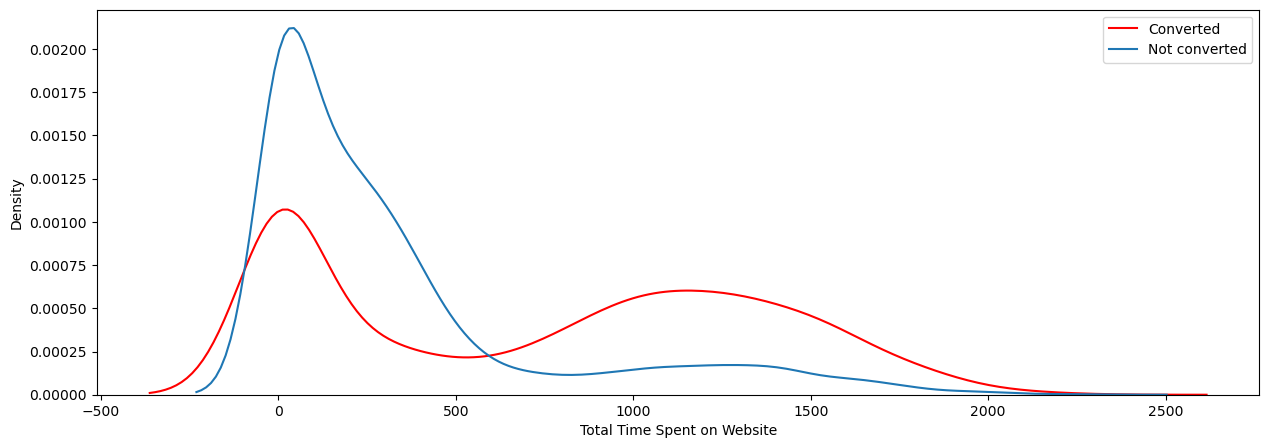

-----------------------------------------------------------------------------------------------
Figure Name : Page Views Per Visit
-----------------------------------------------------------------------------------------------


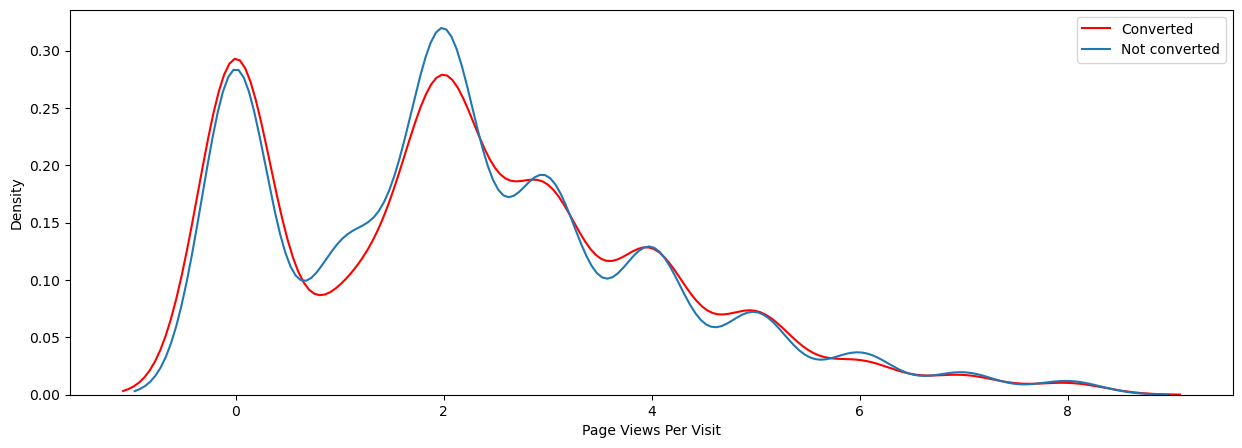

In [72]:
for i in new_numerical_column.columns:
    numplot(i)

##### Inferences:

##### Figure Name : TotalVisits ::The total number of visits made by the customer on the website.
   1. Large number(2189) of customers have not visited X Education website 
   2. As we can infer from the figure once the number of visit is more than 2.5 the conversion rate increases (From here conversion rate increase with increase in visits). So if the number of visits is less then they are less likely to convert as compared to customers who visits website

##### Figure Name : Total Time Spent on Website
   1. We can seen that maximum number (2193) of customers has spent close to 0 time on website
   2. If customer has spent less time on website then they less likely to convert as compared to customers who spend more time on website
   
##### Figure Name : Page Views Per Visit
   1. There are about customers who have visited 0.0 pages per visit


In [73]:
lead_scoring_df['TotalVisits'].value_counts()

0.0     2189
2.0     1680
3.0     1443
4.0     1120
5.0      783
6.0      466
1.0      395
7.0      309
8.0      224
9.0      119
10.0      91
11.0      68
13.0      43
12.0      40
14.0      27
16.0      18
15.0      14
Name: TotalVisits, dtype: int64

In [74]:
lead_scoring_df.shape

(9029, 15)

In [75]:
lead_scoring_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9029 non-null   object 
 1   Lead Number                             9029 non-null   int64  
 2   Lead Origin                             9029 non-null   object 
 3   Lead Source                             9029 non-null   object 
 4   Do Not Email                            9029 non-null   object 
 5   Do Not Call                             9029 non-null   object 
 6   Converted                               9029 non-null   int64  
 7   TotalVisits                             9029 non-null   float64
 8   Total Time Spent on Website             9029 non-null   int64  
 9   Page Views Per Visit                    9029 non-null   float64
 10  Last Activity                           9029 non-null   obje

### Step:3 - Data Preparation

#### Create Dummy Variable -
1. Converting some binary variables (Yes/No) to (1/0).
2. Creating Dummy Variables for categorical features.
3. Drop first dummy variable as p-1 dummies can explain the p category.

In [76]:
# Convert some binary variables (Yes/No) to (1/0)

vars = ['Do Not Email', 'Do Not Call', 'Search', 'A free copy of Mastering The Interview']

# define map function
def binary_map(x):
    return x.map({'Yes':1, 'No':0})

# Call the function to map those columns
lead_scoring_df[vars] = lead_scoring_df[vars].apply(binary_map)

In [77]:
lead_scoring_df['Do Not Email'].describe()

count    9029.000000
mean        0.077749
std         0.267792
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Do Not Email, dtype: float64

In [78]:
# Check type object columns

temp_col = lead_scoring_df.loc[:, lead_scoring_df.dtypes=='object']
temp_col.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation', 'Last Notable Activity'],
      dtype='object')

In [79]:
# Create dummies for folllowing columns

dummies = pd.get_dummies(lead_scoring_df[['Lead Origin', 'Lead Source', 'Last Activity',
                                          'What is your current occupation', 'Last Notable Activity']], drop_first=True)

lead_scoring_df = pd.concat([lead_scoring_df, dummies], axis=1)

In [80]:
lead_scoring_df.shape

(9029, 76)

In [81]:
lead_scoring_df.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
lead_scoring_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation', 'Search',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_

In [83]:
# Drop follwing columns

lead_scoring_df = lead_scoring_df.drop(['Lead Origin_Quick Add Form', 'Lead Source_NC_EDM',
                                        'Last Activity_Resubscribed to emails', 'Last Notable Activity_Resubscribed to emails',
                                        'Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 
                                        'Last Activity','What is your current occupation',
                                        'Last Notable Activity'], axis=1)

In [84]:
lead_scoring_df.shape

(9029, 65)

In [85]:
lead_scoring_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9029 non-null   int64  
 1   Do Not Call                                           9029 non-null   int64  
 2   Converted                                             9029 non-null   int64  
 3   TotalVisits                                           9029 non-null   float64
 4   Total Time Spent on Website                           9029 non-null   int64  
 5   Page Views Per Visit                                  9029 non-null   float64
 6   Search                                                9029 non-null   int64  
 7   A free copy of Mastering The Interview                9029 non-null   int64  
 8   Lead Origin_Landing Page Submission                   9029

##### Inferences - There is. no null values, and to get the relationship between columns,  not creating heatmaps, due to huge number of columns.

#### Traning and Test set -

In [86]:
# Add feature variables to X

X = lead_scoring_df.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [87]:
# Add target variable to y

y = lead_scoring_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [88]:
# Split Train Test Set

X_train, X_test,  y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [89]:
X_train.columns

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened'

#### Features Standardisation  -

In [90]:
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5493,0,0,-0.394290,-0.708153,-0.135234,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
8064,0,0,-0.039721,-0.711823,0.410454,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4716,1,0,-0.039721,-0.471434,0.410454,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
9117,0,0,-1.103429,-0.884316,-1.226608,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2402,0,0,1.023987,0.704822,-0.135234,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Step:4 -Building a Logistic Regreassion Model
1. Mixed Approach.
2. Automated coarse tunning with manual fine tunning slection.
3. For Automated coarse tunning we use RFE for feature selection.
4. Then use statmodel for building the model.

#### RFE - Reccursive feature elimination -
1. Start with 20 features.
2. Using the LogisticRegreassionfunction from sklearn. 

In [91]:
logreg = LogisticRegression()

# Start with 20 features

rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [92]:
# View columns selected by RFE awith their weights

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 44),
 ('TotalVisits', False, 25),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 28),
 ('Search', False, 29),
 ('A free copy of Mastering The Interview', False, 41),
 ('Lead Origin_Landing Page Submission', False, 17),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 24),
 ('Lead Source_Direct Traffic', False, 5),
 ('Lead Source_Facebook', False, 23),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Live Chat', False, 34),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 6),
 ('Lead Source_Pay per Click Ads', False, 45),
 ('Lead Source_Press_Release', False, 38),
 ('Lead Source_Reference', False, 16),
 ('Lead Source_Referral Sites', False, 7),
 ('Lead Source_Social Media', False, 9),
 ('Lead Source_WeLearn', False, 18),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 35),
 ('Lead Source_blog', False, 26),
 ('Lead Source_testo

In [93]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Not Sure',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_View in browser link Clicked',
       'What is your current occupation_Housewife',
       'What is your current occupation_No Information',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable'],
      dtype='object')

###### Model 1 -

In [94]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2531.0
Date:                Fri, 14 Jul 2023   Deviance:                       5062.0
Time:                        18:00:44   Pearson chi2:                 6.53e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4106
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3855      0.073      5.269      0.000       0.242       0.529
Do Not Email                                            -1.2985      0.198     -6.570      0.000      -1.686      -0.911
Total Time Spent on Website                              1.1060      0.041     27.014      0.000       1.026       1.186
Lead Origin_Lead Add Form                                3.5959      0.216     16.645      0.000       3.172       4.019
Lead Source_Olark Chat                                   1.3379      0.107     12.548      0.000       1.129       1.547
Lead Source_Welingak Website                             2.1281      0.744      2.859      0.004       0.669       3.587
Last Activity_Converted to Lead                         -0.9479      0.217     -4.370      0.000      -1.373      -0.523
Last Activity_Email Bounced                             -1.1556      0.356     -3.246      0.001      -1.853      -0.458
Last Activity_Not Sure                                  -1.5803      0.447     -3.535      0.000      -2.457      -0.704
Last Activity_Olark Chat Conversation                   -1.2701      0.194     -6.538      0.000      -1.651      -0.889
Last Activity_View in browser link Clicked             -22.1009   2.61e+04     -0.001      0.999   -5.11e+04    5.11e+04
What is your current occupation_Housewife               22.9032   1.72e+04      0.001      0.999   -3.38e+04    3.38e+04
What is your current occupation_No Information          -1.1402      0.089    -12.815      0.000      -1.315      -0.966
What is your current occupation_Working Professional     2.3694      0.183     12.961      0.000       2.011       2.728
Last Notable Activity_Email Link Clicked                -1.5901      0.260     -6.122      0.000      -2.099      -1.081
Last Notable Activity_Email Opened                      -1.3628      0.090    -15.073      0.000      -1.540      -1.186
Last Notable Activity_Had a Phone Conversation           2.0649      1.110      1.860      0.063      -0.111       4.241
Last Notable Activity_Modified                          -1.6381      0.104    -15.739      0.000      -1.842      -1.434
Last Notable Activity_Olark Chat Conversation           -1.3230      0.373     -3.547      0.000      -2.054      -0.592
Last Notable Activity_Page Visited on Website           -1.6577      0.213     -7.794      0.000      -2.075      -1.241
Last Notable Activity_Unreachable                        0.3131      0.557      0.562      0.574      -0.779       1.405
========================================================================================================================
"""

Removing column Last Activity_View in browser link Clicked as it has a high pvalue and hence is insignificant

In [95]:
col = col.drop('Last Activity_View in browser link Clicked',1)

###### Model 2 -

In [96]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2532.5
Date:                Fri, 14 Jul 2023   Deviance:                       5065.0
Time:                        18:00:44   Pearson chi2:                 6.52e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4103
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3832      0.073      5.241      0.000       0.240       0.526
Do Not Email                                            -1.2965      0.198     -6.560      0.000      -1.684      -0.909
Total Time Spent on Website                              1.1078      0.041     27.061      0.000       1.028       1.188
Lead Origin_Lead Add Form                                3.6006      0.216     16.668      0.000       3.177       4.024
Lead Source_Olark Chat                                   1.3412      0.107     12.580      0.000       1.132       1.550
Lead Source_Welingak Website                             2.1272      0.744      2.858      0.004       0.668       3.586
Last Activity_Converted to Lead                         -0.9422      0.217     -4.346      0.000      -1.367      -0.517
Last Activity_Email Bounced                             -1.1540      0.356     -3.242      0.001      -1.852      -0.456
Last Activity_Not Sure                                  -1.5790      0.447     -3.532      0.000      -2.455      -0.703
Last Activity_Olark Chat Conversation                   -1.2661      0.194     -6.519      0.000      -1.647      -0.885
What is your current occupation_Housewife               22.9043   1.72e+04      0.001      0.999   -3.38e+04    3.38e+04
What is your current occupation_No Information          -1.1396      0.089    -12.805      0.000      -1.314      -0.965
What is your current occupation_Working Professional     2.3528      0.181     12.976      0.000       1.997       2.708
Last Notable Activity_Email Link Clicked                -1.5887      0.260     -6.117      0.000      -2.098      -1.080
Last Notable Activity_Email Opened                      -1.3610      0.090    -15.058      0.000      -1.538      -1.184
Last Notable Activity_Had a Phone Conversation           2.0677      1.110      1.862      0.063      -0.109       4.244
Last Notable Activity_Modified                          -1.6410      0.104    -15.773      0.000      -1.845      -1.437
Last Notable Activity_Olark Chat Conversation           -1.3269      0.373     -3.557      0.000      -2.058      -0.596
Last Notable Activity_Page Visited on Website           -1.6563      0.213     -7.788      0.000      -2.073      -1.239
Last Notable Activity_Unreachable                        0.3146      0.557      0.565      0.572      -0.777       1.407
========================================================================================================================
"""

Removing column What is your current occupation_Housewife as it has a high pvalue and hence is insignificant

In [97]:
col = col.drop('What is your current occupation_Housewife',1)

###### Model 3 -

In [98]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2537.2
Date:                Fri, 14 Jul 2023   Deviance:                       5074.4
Time:                        18:00:45   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4094
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3850      0.073      5.266      0.000       0.242       0.528
Do Not Email                                            -1.2976      0.198     -6.566      0.000      -1.685      -0.910
Total Time Spent on Website                              1.1075      0.041     27.080      0.000       1.027       1.188
Lead Origin_Lead Add Form                                3.6019      0.216     16.688      0.000       3.179       4.025
Lead Source_Olark Chat                                   1.3368      0.107     12.549      0.000       1.128       1.546
Lead Source_Welingak Website                             2.1208      0.744      2.850      0.004       0.662       3.580
Last Activity_Converted to Lead                         -0.9469      0.217     -4.369      0.000      -1.372      -0.522
Last Activity_Email Bounced                             -1.1555      0.356     -3.246      0.001      -1.853      -0.458
Last Activity_Not Sure                                  -1.5853      0.447     -3.546      0.000      -2.461      -0.709
Last Activity_Olark Chat Conversation                   -1.2679      0.194     -6.530      0.000      -1.648      -0.887
What is your current occupation_No Information          -1.1435      0.089    -12.856      0.000      -1.318      -0.969
What is your current occupation_Working Professional     2.3478      0.181     12.949      0.000       1.992       2.703
Last Notable Activity_Email Link Clicked                -1.5878      0.260     -6.112      0.000      -2.097      -1.079
Last Notable Activity_Email Opened                      -1.3538      0.090    -14.993      0.000      -1.531      -1.177
Last Notable Activity_Had a Phone Conversation           2.0668      1.111      1.861      0.063      -0.110       4.243
Last Notable Activity_Modified                          -1.6368      0.104    -15.745      0.000      -1.840      -1.433
Last Notable Activity_Olark Chat Conversation           -1.3225      0.373     -3.545      0.000      -2.054      -0.591
Last Notable Activity_Page Visited on Website           -1.6562      0.213     -7.788      0.000      -2.073      -1.239
Last Notable Activity_Unreachable                        0.3150      0.557      0.565      0.572      -0.777       1.407
========================================================================================================================
"""

Removing column Last Notable Activity_Unreachable as it has a high pvalue and hence is insignificant

In [99]:
col = col.drop('Last Notable Activity_Unreachable',1)

###### Model 4 -

In [100]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2537.4
Date:                Fri, 14 Jul 2023   Deviance:                       5074.8
Time:                        18:00:45   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4094
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.3896      0.073      5.362      0.000       0.247       0.532
Do Not Email                                            -1.3005      0.198     -6.581      0.000      -1.688      -0.913
Total Time Spent on Website                              1.1073      0.041     27.078      0.000       1.027       1.187
Lead Origin_Lead Add Form                                3.6023      0.216     16.691      0.000       3.179       4.025
Lead Source_Olark Chat                                   1.3361      0.107     12.543      0.000       1.127       1.545
Lead Source_Welingak Website                             2.1199      0.744      2.848      0.004       0.661       3.579
Last Activity_Converted to Lead                         -0.9470      0.217     -4.369      0.000      -1.372      -0.522
Last Activity_Email Bounced                             -1.1551      0.356     -3.245      0.001      -1.853      -0.457
Last Activity_Not Sure                                  -1.5855      0.447     -3.547      0.000      -2.462      -0.709
Last Activity_Olark Chat Conversation                   -1.2678      0.194     -6.530      0.000      -1.648      -0.887
What is your current occupation_No Information          -1.1420      0.089    -12.847      0.000      -1.316      -0.968
What is your current occupation_Working Professional     2.3471      0.181     12.944      0.000       1.992       2.702
Last Notable Activity_Email Link Clicked                -1.5927      0.260     -6.134      0.000      -2.102      -1.084
Last Notable Activity_Email Opened                      -1.3586      0.090    -15.108      0.000      -1.535      -1.182
Last Notable Activity_Had a Phone Conversation           2.0617      1.110      1.857      0.063      -0.115       4.238
Last Notable Activity_Modified                          -1.6415      0.104    -15.838      0.000      -1.845      -1.438
Last Notable Activity_Olark Chat Conversation           -1.3273      0.373     -3.559      0.000      -2.058      -0.596
Last Notable Activity_Page Visited on Website           -1.6609      0.213     -7.816      0.000      -2.077      -1.244
========================================================================================================================
"""

Removing column Last Notable Activity_Unreachable as it has a high pvalue and hence is insignificant

In [101]:
col = col.drop('Last Notable Activity_Had a Phone Conversation',1)

###### Model 5 -

In [102]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2539.9
Date:                Fri, 14 Jul 2023   Deviance:                       5079.8
Time:                        18:00:45   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4089
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4037      0.072      5.576      0.000       0.262       0.546
Do Not Email                                            -1.3094      0.198     -6.626      0.000      -1.697      -0.922
Total Time Spent on Website                              1.1054      0.041     27.061      0.000       1.025       1.185
Lead Origin_Lead Add Form                                3.5973      0.216     16.665      0.000       3.174       4.020
Lead Source_Olark Chat                                   1.3293      0.106     12.487      0.000       1.121       1.538
Lead Source_Welingak Website                             2.1196      0.744      2.848      0.004       0.661       3.578
Last Activity_Converted to Lead                         -0.9479      0.217     -4.376      0.000      -1.373      -0.523
Last Activity_Email Bounced                             -1.1526      0.356     -3.239      0.001      -1.850      -0.455
Last Activity_Not Sure                                  -1.5825      0.447     -3.542      0.000      -2.458      -0.707
Last Activity_Olark Chat Conversation                   -1.2660      0.194     -6.522      0.000      -1.647      -0.886
What is your current occupation_No Information          -1.1419      0.089    -12.851      0.000      -1.316      -0.968
What is your current occupation_Working Professional     2.3436      0.181     12.924      0.000       1.988       2.699
Last Notable Activity_Email Link Clicked                -1.6043      0.260     -6.181      0.000      -2.113      -1.096
Last Notable Activity_Email Opened                      -1.3708      0.090    -15.269      0.000      -1.547      -1.195
Last Notable Activity_Modified                          -1.6531      0.104    -15.970      0.000      -1.856      -1.450
Last Notable Activity_Olark Chat Conversation           -1.3384      0.373     -3.590      0.000      -2.069      -0.608
Last Notable Activity_Page Visited on Website           -1.6725      0.212     -7.875      0.000      -2.089      -1.256
========================================================================================================================
"""

##### Inferences - P value of all variables is < 0.05. So all variables seems to be significant.

In [103]:
# Gett the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5493    0.115864
8064    0.115449
4716    0.014459
9117    0.350863
2402    0.453145
1796    0.035380
1120    0.035380
253     0.057627
1491    0.083259
2004    0.415186
dtype: float64

In [104]:
# Reshape

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.11586368, 0.11544875, 0.01445895, 0.35086334, 0.4531454 ,
       0.03537972, 0.03537972, 0.05762721, 0.08325887, 0.41518643])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [105]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.115864,5493
1,0,0.115449,8064
2,0,0.014459,4716
3,0,0.350863,9117
4,1,0.453145,2402


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [106]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.115864,5493,0
1,0,0.115449,8064,0
2,0,0.014459,4716,0
3,0,0.350863,9117,0
4,1,0.453145,2402,0


##### Let's check confusion matrices and accuracy

In [107]:
# Confusion matrix 
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion1)

[[3464  445]
 [ 720 1691]]


In [108]:
# Predicted     not_converted    converted
# Actual
# not_converted        3464      445
# converted            720       1691  

In [109]:
# Check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8156645569620253


###### Accuracy rate is around 81% which is good. But we will also need to calculate the other metrics as we cannot depend only on the accuracy metrics only.

##### Checking VIFs

In [110]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_Modified,2.22
8,Last Activity_Olark Chat Conversation,2.07
0,Do Not Email,1.84
6,Last Activity_Email Bounced,1.82
3,Lead Source_Olark Chat,1.73
2,Lead Origin_Lead Add Form,1.62
9,What is your current occupation_No Information,1.58
14,Last Notable Activity_Olark Chat Conversation,1.34
4,Lead Source_Welingak Website,1.29
5,Last Activity_Converted to Lead,1.26


##### Inferences - VIFs of all variables is < 5. So all we can proceed with making prediction using this model only.

##### Metrices -  Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value.

In [111]:
# Predicted     not_converted    converted
# Actual
# not_converted        3464      445
# converted            720       1691  

In [112]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [113]:
# Sensitivity/TPR(True Positive Rate)

TP / float(TP+FN)

0.7013687266694317

In [114]:
# Specificity

TN / float(TN+FP)

0.8861601432591456

In [115]:
# FPR(False Postive Rate) - Predicting non converted when lead have converted

print(FP/ float(TN+FP))

0.11383985674085444


In [116]:
# Positive Predictive Value 

print (TP / float(TP+FP))

0.7916666666666666


In [117]:
# Negative Predictive Value

print (TN / float(TN+ FN))

0.8279158699808795


### Step:5 -Plotting the ROC Curve

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [118]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [119]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )


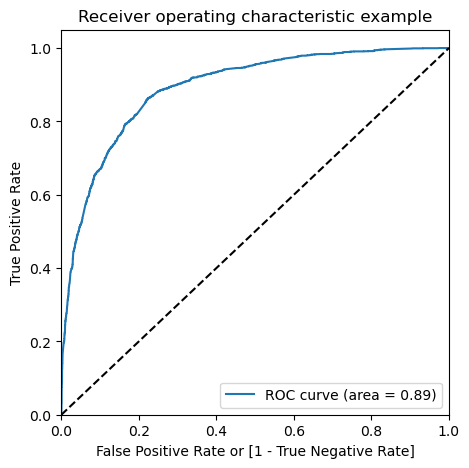

In [120]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

##### Inferences - The area under the curve is 89% of the total area. Which is so far good.

### Step 6: Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [121]:
# Create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.115864,5493,0,1,1,0,0,0,0,0,0,0,0
1,0,0.115449,8064,0,1,1,0,0,0,0,0,0,0,0
2,0,0.014459,4716,0,1,0,0,0,0,0,0,0,0,0
3,0,0.350863,9117,0,1,1,1,1,0,0,0,0,0,0
4,1,0.453145,2402,0,1,1,1,1,1,0,0,0,0,0


In [122]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381487  1.000000  0.000000
0.1   0.1  0.613449  0.977603  0.388846
0.2   0.2  0.765823  0.909166  0.677411
0.3   0.3  0.806646  0.867275  0.769250
0.4   0.4  0.818671  0.790958  0.835764
0.5   0.5  0.815665  0.701369  0.886160
0.6   0.6  0.809019  0.628370  0.920440
0.7   0.7  0.785601  0.518042  0.950627
0.8   0.8  0.762025  0.423891  0.970581
0.9   0.9  0.715981  0.277063  0.986697


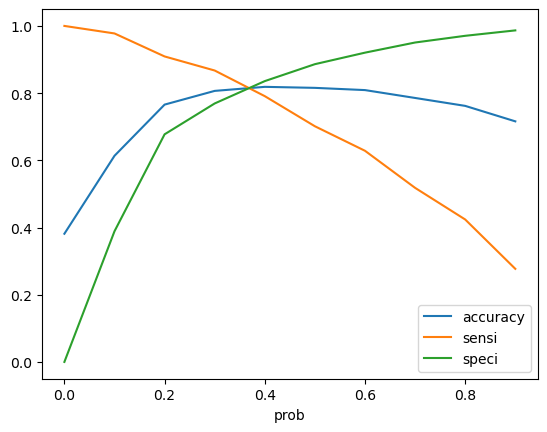

In [123]:
# Plot accuracy sensitivity and specificity for various probabilities

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Curve is saying 0.37 is the optimum point to take it as a cutoff probability.

In [124]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.115864,5493,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.115449,8064,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.014459,4716,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.350863,9117,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.453145,2402,0,1,1,1,1,1,0,0,0,0,0,1


In [125]:
# Calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(10)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.115864,5493,0,1,1,0,0,0,0,0,0,0,0,0,12
1,0,0.115449,8064,0,1,1,0,0,0,0,0,0,0,0,0,12
2,0,0.014459,4716,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,0.350863,9117,0,1,1,1,1,0,0,0,0,0,0,0,35
4,1,0.453145,2402,0,1,1,1,1,1,0,0,0,0,0,1,45
5,0,0.035380,1796,0,1,0,0,0,0,0,0,0,0,0,0,4
6,0,0.035380,1120,0,1,0,0,0,0,0,0,0,0,0,0,4
7,0,0.057627,253,0,1,0,0,0,0,0,0,0,0,0,0,6
8,0,0.083259,1491,0,1,0,0,0,0,0,0,0,0,0,0,8
9,1,0.415186,2004,0,1,1,1,1,1,0,0,0,0,0,1,42


In [126]:
# Confusion matrix 

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print(confusion2)


[[3193  716]
 [ 465 1946]]


In [127]:
# Check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.8131329113924051


In [128]:
# Predicted     not_converted    converted
# Actual
# not_converted        3007      902
# converted            320       2091  

In [129]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [130]:
# Sensitivity/TPR(True Positive Rate)

TP / float(TP+FN)

0.8071339693073414

In [131]:
# Specificity

TN / float(TN+FP)

0.8168329496034792

In [132]:
# FPR(False Postive Rate) - Predicting non converted when lead have converted

print(FP/ float(TN+FP))

0.18316705039652084


In [133]:
# Positive Predictive Value 

print (TP / float(TP+FP))

0.7310293012772352


In [134]:
# Negative Predictive Value

print (TN / float(TN+ FN))

0.8728813559322034


### Step 7: Precision and Recall

In [135]:
# Confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3464,  445],
       [ 720, 1691]], dtype=int64)

##### Precision
TP / TP + FP

In [136]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7916666666666666

##### Recall
TP / TP + FN

In [137]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7013687266694317

##### Precision and recall tradeoff

In [138]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

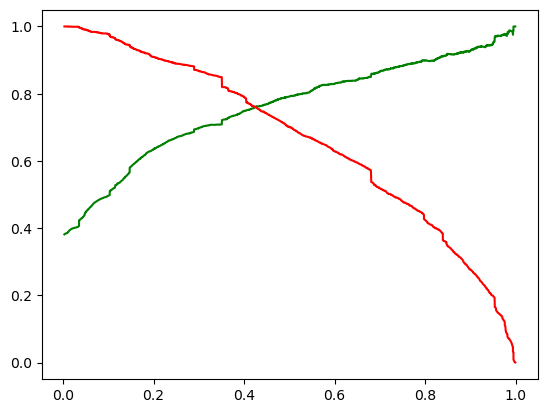

In [139]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [141]:
# Performing predictions on the test set
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Not Sure,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_No Information,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4664,-0.289137,-0.027181,-1.099586,-0.878776,-1.208743,-0.033296,-0.660586,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5394,-0.289137,-0.027181,0.352414,-0.582229,-0.470067,-0.033296,-0.660586,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1595,-0.289137,-0.027181,0.352414,1.238640,1.012839,-0.033296,-0.660586,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2111,-0.289137,-0.027181,1.441414,0.065110,2.679026,-0.033296,1.513808,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9182,-0.289137,-0.027181,-1.099586,-0.878776,-1.208743,-0.033296,-0.660586,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [148]:
# Predicting the test dataset with our final model
X_test1 = sm.add_constant(X_test)
X_test1.head()

,const,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Not Sure,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_No Information,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4664,1.0,-0.289137,-0.027181,-1.099586,-0.878776,-1.208743,-0.033296,-0.660586,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5394,1.0,-0.289137,-0.027181,0.352414,-0.582229,-0.470067,-0.033296,-0.660586,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1595,1.0,-0.289137,-0.027181,0.352414,1.238640,1.012839,-0.033296,-0.660586,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2111,1.0,-0.289137,-0.027181,1.441414,0.065110,2.679026,-0.033296,1.513808,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9182,1.0,-0.289137,-0.027181,-1.099586,-0.878776,-1.208743,-0.033296,-0.660586,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [150]:
test_cols=X_train_sm.columns[1:]              # Taking the same columns as train set
X_test_final=X_test1[test_cols]               # Updating it in the final test set
X_test_final=sm.add_constant(X_test_final)   # Adding constant to the final set set
y_pred_test=res.predict(X_test_final)       # Predicting the final test set

In [151]:
test_cols


Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Not Sure',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_No Information',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [154]:
# Creating a new dataset and saving the prediction values in it

y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_pred_test,'ID':y_test.index})
y_test_pred_final.head()   # viewing first 5 rows

,Converted,Converted_Probability,ID
4664,0,0.442622,4664
5394,0,0.209649,5394
1595,1,0.944901,1595
2111,0,0.159973,2111
9182,0,0.374515,9182


In [155]:
#Model Evaluation
# Predicting the outcomes with probability cutoff as 0.4 by creating new columns in the final test dataset

y_test_pred_final['Predicted']=y_test_pred_final['Converted_Probability'].map(lambda x:1 if x >0.4 else 0 )  # Predicted value 

y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted
4664,0,0.442622,4664,1
5394,0,0.209649,5394,0
1595,1,0.944901,1595,1
2111,0,0.159973,2111,0
9182,0,0.374515,9182,0


In [156]:
# Checking the accuracy of the test dataset.

from sklearn import metrics    # Imprting metrics from sklearn

print('Accuracy score in predicting test dataset :',metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))

Accuracy score in predicting test dataset : 0.8069398301956442


In [157]:
from sklearn.metrics import precision_score, recall_score     # Importing precision and recall score from sklearn

print('Precision score in predicting test dataset:',precision_score(y_test_pred_final.Converted, y_test_pred_final.Predicted))   # Printing the precision score

print('Recall score in predicting test dataset:',recall_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)) 

Precision score in predicting test dataset: 0.7142857142857143
Recall score in predicting test dataset: 0.848968105065666


In [160]:
#Lead Score assigning
# Creating new columns lead score

y_test_pred_final['Lead Score']=y_test_pred_final['Converted_Probability'].apply(lambda x:round(x*100))


y_test_pred_final.head()

,Converted,Converted_Probability,ID,Predicted,Lead Score
4664,0,0.442622,4664,1,44
5394,0,0.209649,5394,0,21
1595,1,0.944901,1595,1,94
2111,0,0.159973,2111,0,16
9182,0,0.374515,9182,0,37


#### Inference: 
- Use the lead_score column to identify which potential leads to prioritize first. The higher the score, the higher chances are there for the lead to convert. 

In [168]:
# Final model features and coefficients 

final_variable = res.params[1:]
final_variable


Do Not Email                                           -1.31
Total Time Spent on Website                             1.11
Lead Origin_Lead Add Form                               3.60
Lead Source_Olark Chat                                  1.33
Lead Source_Welingak Website                            2.12
Last Activity_Converted to Lead                        -0.95
Last Activity_Email Bounced                            -1.15
Last Activity_Not Sure                                 -1.58
Last Activity_Olark Chat Conversation                  -1.27
What is your current occupation_No Information         -1.14
What is your current occupation_Working Professional    2.34
Last Notable Activity_Email Link Clicked               -1.60
Last Notable Activity_Email Opened                     -1.37
Last Notable Activity_Modified                         -1.65
Last Notable Activity_Olark Chat Conversation          -1.34
Last Notable Activity_Page Visited on Website          -1.67
dtype: float64

In [174]:
#Getting a relative coeffient value

top_pred = final_variable
top_pred = 100.0 * (top_pred / top_pred.max())
top_pred.sort_values()


Last Notable Activity_Page Visited on Website          -46.49
Last Notable Activity_Modified                         -45.95
Last Notable Activity_Email Link Clicked               -44.60
Last Activity_Not Sure                                 -43.99
Last Notable Activity_Email Opened                     -38.10
Last Notable Activity_Olark Chat Conversation          -37.21
Do Not Email                                           -36.40
Last Activity_Olark Chat Conversation                  -35.19
Last Activity_Email Bounced                            -32.04
What is your current occupation_No Information         -31.74
Last Activity_Converted to Lead                        -26.35
Total Time Spent on Website                             30.73
Lead Source_Olark Chat                                  36.95
Lead Source_Welingak Website                            58.92
What is your current occupation_Working Professional    65.15
Lead Origin_Lead Add Form                              100.00
dtype: f

In [179]:
res.params

const                                                   0.40
Do Not Email                                           -1.31
Total Time Spent on Website                             1.11
Lead Origin_Lead Add Form                               3.60
Lead Source_Olark Chat                                  1.33
Lead Source_Welingak Website                            2.12
Last Activity_Converted to Lead                        -0.95
Last Activity_Email Bounced                            -1.15
Last Activity_Not Sure                                 -1.58
Last Activity_Olark Chat Conversation                  -1.27
What is your current occupation_No Information         -1.14
What is your current occupation_Working Professional    2.34
Last Notable Activity_Email Link Clicked               -1.60
Last Notable Activity_Email Opened                     -1.37
Last Notable Activity_Modified                         -1.65
Last Notable Activity_Olark Chat Conversation          -1.34
Last Notable Activity_Pa

### Conclusion:
- The Accuracy, Precision and Recall score we have obtained is in acceptable range.
- We have high recall than precision which we were aiming to obtain. In business terms, this model has an ability to adjust with the company’s requirements in coming future. This concludes that the model is in stable state.

### Final Equation Logit Function:- 

logit(p) = log(p/(1-p)) = 0.40 + (Do Not Email * -1.31) + (Total Time Spent on Website * 1.11) +(Lead Origin_Lead Add Form * 3.60) + (Lead Source_Olark Chat * 1.33) + (Lead Source_Welingak Website * 2.12) + (Last Activity_Converted to Lead * -0.95) + (Last Activity_Email Bounced * -1.15) + (Last Activity_Not Sure *-1.58)+ (Last Activity_Olark Chat Conversation  *   -1.27) + (What is your current occupation_No Information  * -1.14)+ (What is your current occupation_Working Professional * 2.34) + (Last Notable Activity_Email Link Clicked  * -1.60) + (Last Notable Activity_Email Opened  * -1.37) + (Last Notable Activity_Modified   *  -1.65) + (Last Notable Activity_Olark Chat Conversation  *-1.34) + (Last Notable Activity_Page Visited on Website  * -1.67)